### Amazon [제품, 리뷰]

In [70]:
from tqdm import tqdm_notebook as tqdm


In [71]:
from selenium import webdriver
import time
from webdriver_manager.chrome import ChromeDriverManager
import requests as reg
from bs4 import BeautifulSoup as bs
import pandas as pd

In [72]:
from selenium.webdriver.common.action_chains import ActionChains

In [73]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.amazon.com/ref=nav_logo")
driver.maximize_window()

In [74]:
#[검색부터 물품(갤럭시) select까지 ]
search_box = driver.find_element_by_xpath('//*[@id="twotabsearchtextbox"]')
search_box.send_keys("Galaxy S22 Ultra")
time.sleep(1)

click_button = driver.find_element_by_xpath('//*[@id="nav-search-submit-button"]')
click_button.click()
time.sleep(1)

click_button_productSelect = driver.find_element_by_css_selector('div > span > a > div > img')
click_button_productSelect.click()
time.sleep(1)



In [75]:
#[리뷰항목으로 넘어가기]
see_all_reviews = driver.find_element_by_xpath('//*[@id="reviews-medley-footer"]/div[2]/a')
see_all_reviews.click()
time.sleep(1)

In [76]:
name = driver.find_elements_by_css_selector('div.a-profile-content > span')[2:]
for i in name:
    print(i.text)

Andy P.
Emptor
John Chapman
Ryan Bradley
George
Sumeet
Matthew E.
Mark Dunkum
Fadi
Amazon Customer


In [77]:
# soup = bs(driver.page_source,'html.parser')
# ratings = soup.find_all('i',{'data-hook':'review-star-rating'})
for i in ratings:
    print(i.text)

4.0 out of 5 stars
5.0 out of 5 stars
4.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
5.0 out of 5 stars
2.0 out of 5 stars
5.0 out of 5 stars
4.0 out of 5 stars
5.0 out of 5 stars


In [78]:
review_title = driver.find_elements_by_css_selector('a.a-size-base.a-link-normal.review-title.a-color-base.review-title-content.a-text-bold > span')
for i in review_title:
    print(i.text)

Great first impressions! Not on the battery life though...
Phonetastic!
Great phone. Gorilla glass is misleading.
Loving it
Great upgrade from the note 10+
An Amazing Phone Overall
Samsung finally did it for me…never going back to android
Great camera
It has only one sim tray
If you want superb zoom, look no further


In [79]:
test_list = []
soup = bs(driver.page_source,'html.parser')
review_content = soup.find_all('span',{'data-hook':'review-body'})
for i in review_content:
    test_list.append(i.text)

In [80]:
len(ratings),len(review_title),len(review_content),len(name)

(10, 10, 10, 10)

In [2]:
# [Team Project]

from selenium import webdriver
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as panda
from tqdm import tqdm_notebook as tq
from selenium.webdriver.common.keys import Keys



In [7]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.amazon.com/SAMSUNG-Smartphone-Unlocked-Brightest-Processor/dp/B09MVZY521/ref=sr_1_2?crid=BVOGH1N22BLF&keywords=galaxy%2Bs22%2Bultra&qid=1663289260&sprefix=galaxy%2Bs22%2Bultra%2Caps%2C236&sr=8-2&th=1")
time.sleep(2)
driver.maximize_window()

In [8]:
driver.get("https://www.amazon.com/SAMSUNG-Smartphone-Unlocked-Brightest-Processor/dp/B09MVZY521/ref=sr_1_2?crid=BVOGH1N22BLF&keywords=galaxy%2Bs22%2Bultra&qid=1663289260&sprefix=galaxy%2Bs22%2Bultra%2Caps%2C236&sr=8-2&th=1")


In [9]:

reviewer_names = [] # 리뷰어 이름
review_titles = [] # 리뷰 제목
review_ratings = [] # 별점
review_dates = [] #리뷰 날짜
product_colors = [] #제품 색상
review_contents = [] # 리뷰 내용
last = [] # 담아둘 박스

for i in range(4):
    btn = driver.find_element_by_css_selector('#color_name_{}'.format(i))
    btn.click()
    time.sleep(3)
    
    
    #[리뷰항목으로 넘어가기]
    see_all_reviews = driver.find_element_by_css_selector('div.a-row.a-spacing-medium > a')
    see_all_reviews.click()
    time.sleep(1)
    
    while True:
        
        star = bs(driver.page_source, "html.parser")
        #리뷰어 이름 한꺼번에 담기
        names = driver.find_elements_by_css_selector("div.a-profile-content")
        #리뷰 제목 한꺼번에 담기
        titles = driver.find_elements_by_css_selector("a.a-size-base.a-link-normal.review-title.a-color-base.review-title-content.a-text-bold")
        #별점 한꺼번에 담기
        ratings = star.find_all("i",{'data-hook':"review-star-rating"})
        #리뷰 일자 한꺼번에 담기
        dates = driver.find_elements_by_css_selector("span.review-date")
        #핸드폰 색상 한꺼번에 담기
        colors = driver.find_elements_by_css_selector("a.a-size-mini.a-link-normal.a-color-secondary")
        #리뷰 내용 한꺼번에 담기
        contents = driver.find_elements_by_css_selector("div.a-row.a-spacing-small.review-data")
    
        # 다음페이지로 넘어갈 수 없을 때 멈추는 장치
        if names == last:
            break
        last = names

        for i in tq(range(len(names[2:]))):
            #이름 넣기
            reviewer_names.append(names[2:][i].text)
            #리뷰 제목 넣기
            review_titles.append(titles[i].text)
            #별점 넣기!
            review_ratings.append(float((ratings[i].text)[:3]))
            #리뷰 날짜 넣기
            review_dates.append((dates[2:][i].text).replace("Reviewed in the United States on ",""))
            #제품 색상 넣기
            product_colors.append(((colors[i].text)[:-27]).replace("Color: ", ""))
            #리뷰 내용 넣기
            review_contents.append(contents[i].text)
    
        #Next Page
        click_next_page = driver.find_element_by_css_selector('li.a-last')
        click_next_page.click()
        time.sleep(1)
    
    driver.get("https://www.amazon.com/SAMSUNG-Smartphone-Unlocked-Brightest-Processor/dp/B09MVZLCLN/ref=sr_1_1_sspa?crid=17RB9I14JU599&keywords=Galaxy%2BS22%2BUltra&qid=1663302869&sprefix=galaxy%2Bs22%2Bultra%2Caps%2C790&sr=8-1-spons&th=1")
    time.sleep(1)

C:\Users\user\AppData\Local\Temp\ipykernel_11136\2165947497.py:41: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tq(range(len(names[2:]))):


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

ValueError: could not convert string to float: '별 5'

In [88]:
s22_ultra_customers = {'Dates': review_dates,'Product Color': product_colors,'User Name': reviewer_names, '5-star Ratings': review_ratings, 'Review Title': review_titles, 'Review Contents':review_contents }
s22_ultra_customers

{'Dates': ['August 11, 2022',
  'August 27, 2022',
  'September 8, 2022',
  'August 21, 2022',
  'August 23, 2022',
  'July 17, 2022',
  'August 21, 2022',
  'June 4, 2022',
  'August 19, 2022',
  'August 12, 2022',
  'September 1, 2022',
  'August 20, 2022',
  'August 28, 2022',
  'August 11, 2022',
  'August 21, 2022',
  'July 30, 2022',
  'June 7, 2022',
  'July 24, 2022',
  'June 6, 2022',
  'April 14, 2022',
  'June 27, 2022',
  'June 15, 2022',
  'March 17, 2022',
  'May 24, 2022',
  'June 12, 2022',
  'August 25, 2022',
  'May 9, 2022',
  'March 10, 2022',
  'August 13, 2022',
  'September 6, 2022',
  'August 6, 2022',
  'April 18, 2022',
  'June 19, 2022',
  'May 4, 2022',
  'May 29, 2022',
  'August 16, 2022',
  'July 26, 2022',
  'September 3, 2022',
  'August 8, 2022',
  'September 14, 2022',
  'July 27, 2022',
  'August 1, 2022',
  'September 4, 2022',
  'August 13, 2022',
  'July 24, 2022',
  'August 12, 2022',
  'August 13, 2022',
  'July 22, 2022',
  'August 5, 2022',
  

In [89]:
s22Ultra_review_Amazon = pd.DataFrame(s22_ultra_customers)
s22Ultra_review_Amazon

,Dates,Product Color,User Name,5-star Ratings,Review Title,Review Contents
0,"August 11, 2022",Burgundy,Jack in the box,5.0,"Upgrade from S9 to 22 ultra, I like it..","I have the S9 and made upgrade to S22 ultra, b..."
1,"August 27, 2022",Burgundy,Gerald Wheeler,4.0,Almost perfect,I am an Android user from the beginning of And...
2,"September 8, 2022",Burgundy,Edgar Picado,5.0,No esperaba menos,"No he utilizado el reconocimiento facial, el u..."
3,"August 21, 2022",Burgundy,Kim Breckenridge,5.0,Nice upgrade,"I've had a Samsung phone since the ""Instinct""!..."
4,"August 23, 2022",Burgundy,Jared R.,5.0,Great phone,Been using the pixel phones for years. Definit...
...,...,...,...,...,...,...
195,"April 24, 2022",Phantom White,Cliff Cabrera,5.0,absolute beast of a phone,This phone has exceeded all my expectations i ...
196,"March 9, 2022",Phantom White,B. Gross,5.0,Note is back,The note is finally back. A bit thicker than p...
197,"February 27, 2022",Phantom White,Rosely R.,1.0,Muy desilusionada de este teléfono,"Estoy muy desilusionada de este teléfono, lo p..."
198,"March 9, 2022",Phantom White,P. W. Newton,3.0,Meh,Awesome phone. Only thing I don't like about i...


In [100]:
import nltk
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.corpus.stopwords.words('english') # 소문자만 인식, lower case

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [101]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt


In [102]:
title_keywords = '' # 'title_keywords를 새로 생성
for i in review_titles: # 리뷰 제목을 따옴
    title_keywords = title_keywords + i

In [103]:
title_keywords

'Upgrade from S9 to 22 ultra, I like it..Almost perfectNo esperaba menosNice upgradeGreat phonePrime DealNew features are greatGood PhoneNot worth the hypeI love this phoneThis phone is awesomeMuy buenoAMAZINGAWESOME!Great phoneFinger printExcellent Quality, Bright Screen, Some QuirksSamsung Galaxy S22 UltraPerfect!Great phoneSo far so goodGreat productwish I mayGreat replacement for my S9ExcelenteAn OK phone with plenty of big brothers behind your backBeast of a machineThe bestDoesn\'t work with Spectrum MobileNetwork SettingJUNKNo extra storageThe Camera was not as high quality as I expected. Very disappointed.Meh. Better deal through entity other than Amazon.Galaxy s22Bigger phone, beautiful camera!Great first impressions! Not on the battery life though...Phonetastic!Great phone. Gorilla glass is misleading.Loving itGreat upgrade from the note 10+An Amazing Phone OverallSamsung finally did it for me…never going back to androidGreat cameraIt has only one sim trayIf you want superb zo

In [150]:
stopwords = ['some',
             'is','..','s9','i','phonenote','phoneso',
             'bestdoes','desilusionada',
             'bestdoes', 
             'storagethe',
             'description',
             'machinethe'] # stopwords 리스트를 새로 만들어 주어야한다

In [139]:
# def 함수// Copy and Paste

def extract_tags_english(string):
    word_list =[]
    string = string.lower()
    string = nltk.word_tokenize(string)
    string = nltk.pos_tag(string)
    
    for word, tag in string:
        if tag in ['NN', 'VB']:
            if word not in stopwords:
                word_list.append(word)
    
    return word_list

In [151]:
title_keywords_update = extract_tags_english(title_keywords)
title_keywords_update

['upgrade',
 'menosnice',
 'upgradegreat',
 'dealnew',
 'hypei',
 'love',
 'phonethis',
 'phone',
 'buenoamazingawesome',
 'phonefinger',
 'printexcellent',
 'quality',
 'screen',
 'quirkssamsung',
 's22',
 'replacement',
 'phone',
 'plenty',
 'backbeast',
 'work',
 'mobilenetwork',
 'settingjunkno',
 'camera',
 'quality',
 'deal',
 'entity',
 's22bigger',
 'phone',
 'camera',
 'battery',
 'life',
 'phone',
 'gorilla',
 'glass',
 'upgrade',
 'note',
 'phone',
 'overallsamsung',
 'me…never',
 'androidgreat',
 'camerait',
 'sim',
 'trayif',
 'zoom',
 'furtherawesomesmartphone',
 'year',
 'phone',
 'muy',
 'buenoi',
 'lose',
 'ineptitude',
 'house😡😡excellent',
 'phone',
 'phonelove',
 'it.biggest',
 'mistake',
 'phonevery',
 '👍good',
 'phonework',
 'goodnot',
 'seamless/flawless',
 'wall',
 'charger',
 'customer',
 'timebeautiful',
 'graphicsnot',
 'bc',
 'flagship',
 'be',
 'life',
 's21',
 'joy',
 'phonedecent',
 'hardware',
 'softwarethe',
 'flagship',
 'phone',
 'battery',
 'brightnes

In [141]:
count = Counter(title_keywords_update)
count

Counter({'upgrade': 2,
         'menosnice': 1,
         'upgradegreat': 1,
         'dealnew': 1,
         'hypei': 1,
         'love': 2,
         'phonethis': 1,
         'phone': 24,
         'buenoamazingawesome': 1,
         'phonefinger': 1,
         'printexcellent': 1,
         'quality': 4,
         'screen': 2,
         'quirkssamsung': 1,
         's22': 1,
         'replacement': 1,
         'plenty': 1,
         'backbeast': 1,
         'work': 3,
         'mobilenetwork': 1,
         'settingjunkno': 1,
         'camera': 6,
         'deal': 2,
         'entity': 1,
         's22bigger': 1,
         'battery': 4,
         'life': 2,
         'gorilla': 1,
         'glass': 2,
         'note': 2,
         'overallsamsung': 1,
         'me…never': 1,
         'androidgreat': 1,
         'camerait': 1,
         'sim': 1,
         'trayif': 1,
         'zoom': 1,
         'furtherawesomesmartphone': 1,
         'year': 1,
         'muy': 2,
         'buenoi': 1,
         'lo

In [142]:
count.most_common(5)

[('phone', 24), ('camera', 6), ('quality', 4), ('battery', 4), ('samsung', 4)]

In [144]:
from PIL import Image
import numpy as np

In [145]:
mask_image = np.array(Image.open(r'C:\Users\user\Desktop\Python\Python_Lectures\galaxy.jpg')) # r은 unicode
mask_image

array([[[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       ...,

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]]

<function matplotlib.pyplot.show(close=None, block=None)>

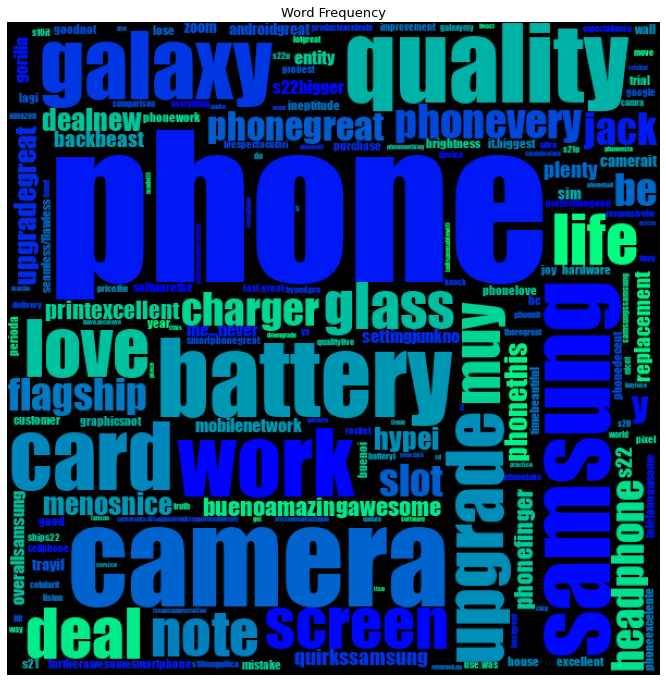

In [149]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\impact.ttf',
                      width = 600,
                      height = 600,
                      background_color = 'black',
                      colormap = 'winter',
                      
                      random_state = 1).generate_from_frequencies(count)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13)
plt.show
